In [40]:
%matplotlib inline

import IPython.display as ipd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal
from sklearn.preprocessing import MultiLabelBinarizer

import utils

sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

In [4]:
tracks = utils.load('C:/Users/night/Documents/09/school/actual-masters/data/fma-master/data/fma_metadata/tracks.csv')
genres = utils.load('C:/Users/night/Documents/09/school/actual-masters/data/fma-master/data/fma_metadata/genres.csv')
features = utils.load('C:/Users/night/Documents/09/school/actual-masters/data/fma-master/data/fma_metadata/features.csv')
echonest = utils.load('C:/Users/night/Documents/09/school/actual-masters/data/fma-master/data/fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [33]:
small = tracks[tracks['set', 'subset'] <= 'small']
medium = tracks[tracks['set', 'subset'] <= 'medium']

subsets = [small, medium]
subset_names = ['small', 'medium']

# small_df = pd.DataFrame(small)
# medium_df = pd.DataFrame(medium)

print('Echonest features available for {} tracks.'.format(len(echonest)))

echonest_tracks = echonest.index.values.tolist()
# print(echonest_tracks)

# small_count = 0
# medium_count = 0

# print(len(tracks['set', 'subset'] <= 'medium'))
# print(len(echonest))

count = 0

# for subset in tracks['set', 'subset'].unique():
#     indicator = tracks['set', 'subset'] <= subset
#     for index, track in tracks.iterrows():
#         if tracks.loc[index]['set', 'subset'] == indicator:
#             count += 1
#     print(count)
    
for i, subset in enumerate(subsets):
    count = 0
    for index, track in subset.iterrows():
        if index in echonest_tracks:
            count += 1
    print(count, "echonest tracks in", subset_names[i], "subset")


# for index, track in small_df.iterrows():
#     if index in echonest_tracks:
#         small_count += 1

# print("small tracks with echonest data:", small_count)

# for index, track in medium_df.iterrows():
#     if index in echonest_tracks:
#         medium_count += 1

# print("medium tracks with echonest data:", medium_count)

Echonest features available for 13129 tracks.
1294 echonest tracks in small subset
5281 echonest tracks in medium subset


In [21]:
for subset in tracks['set', 'subset'].unique():
    indicator = tracks['set', 'subset'] <= subset
    print('{:6} {:6} tracks  {:.1f} days'.format(
        subset, sum(indicator), sum(indicator) * 30 / 3600 / 24))

small    8000 tracks  2.8 days
medium  25000 tracks  8.7 days
large  106574 tracks  37.0 days


In [38]:
# ok so we want to get a dataframe that includes the track id, genre, 
# and all the info from the echonest dataset

df_echo = echonest.iloc[:, 0:8]
df_echo.head()

echo_genres = []

for index, track in df_echo.iterrows():
    genre = tracks.loc[index]['track', 'genre_top']
    echo_genres.append(genre)

df_echo['genre'] = echo_genres
df_echo.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                           genre  
                                                  
         speechiness    tempo   valence           
track_id                                          
2           0.159310  165.922  0.576661  Hip-Hop  
3           0.461818  126.957  0.269240  Hip-Hop  
5           0.124595  100.260  0.621661  Hip-Hop  
10          0.032985  111.562  0.963590      Pop  
134         0.525519  114.290  0.894072  Hip-Hop

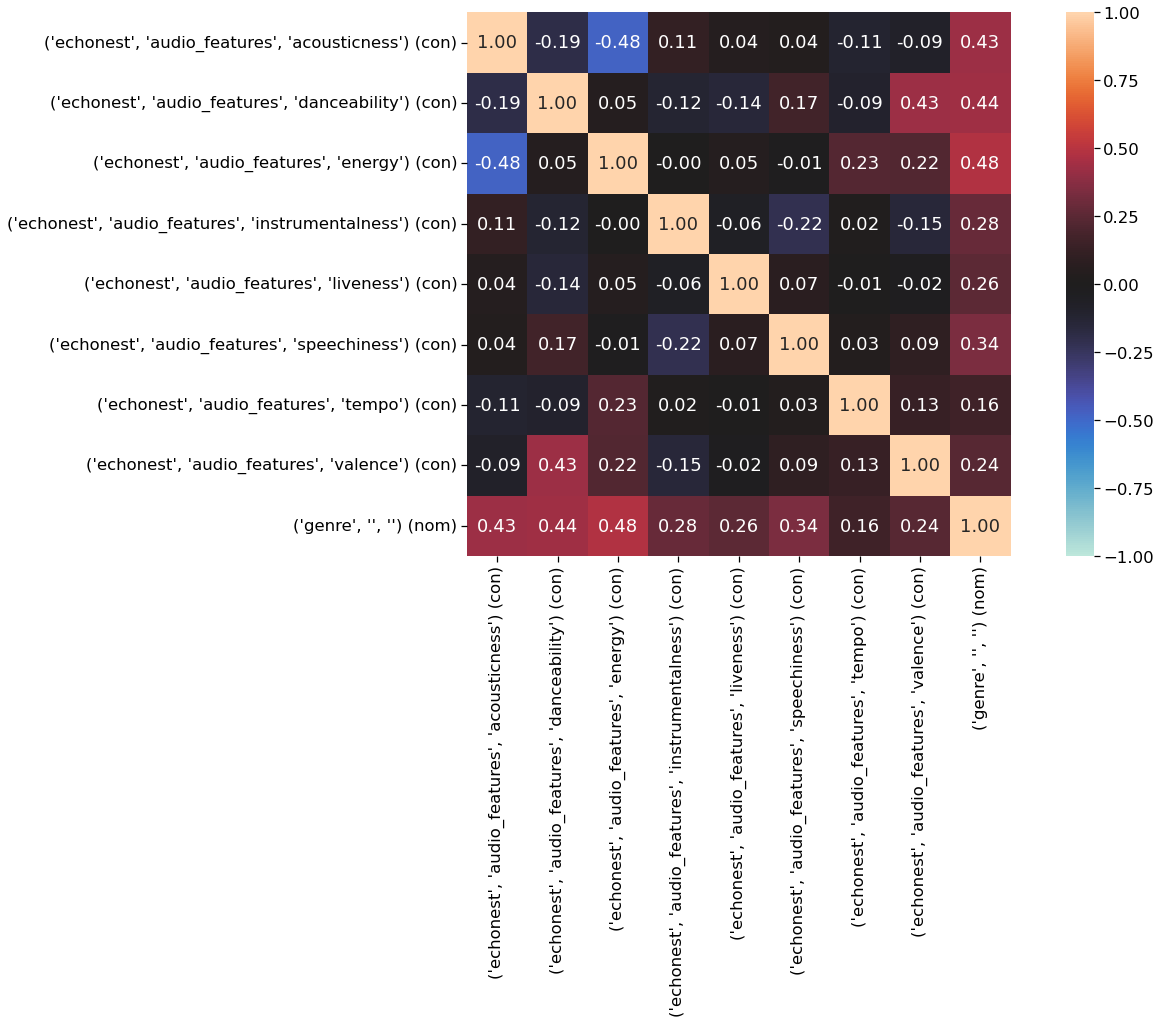

{'corr':                                                     ('echonest', 'audio_features', 'acousticness') (con)  \
 ('echonest', 'audio_features', 'acousticness') ...                                           1.000000      
 ('echonest', 'audio_features', 'danceability') ...                                          -0.189599      
 ('echonest', 'audio_features', 'energy') (con)                                              -0.477273      
 ('echonest', 'audio_features', 'instrumentalnes...                                           0.110033      
 ('echonest', 'audio_features', 'liveness') (con)                                             0.041319      
 ('echonest', 'audio_features', 'speechiness') (...                                           0.038785      
 ('echonest', 'audio_features', 'tempo') (con)                                               -0.110701      
 ('echonest', 'audio_features', 'valence') (con)                                             -0.085436      
 ('genre', 

In [41]:
nominal.associations(df_echo, figsize=(20,10), mark_columns=True)